### Assignment 2, Question 1
#### Devon Richtsmeier

### 1. Choose a logistic regression for a multiclass classification using MNIST data.

In [1]:
# Load the appropriate packages

from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

sns.set_style('whitegrid')

print('Packages loaded.')

Packages loaded.


### a. Do not use PCA. To make images noisy, use different c_noise. Choose a set n_noise = [0, 0.25, 0.5, 1, 1.5, 2, 3, 4.5, 10, 20, 30, 40, 50]. Train the model for each n_noise. Find corresponding accuracy (use, for example, metrics.accuracy_score(pred_va, tar_va)). Plot:  accouracy  vs. n_noise.

### Load the MNIST data from tensorflow and define the input and target sets for training and validation.

In [2]:
# Get the MNIST data 
from tensorflow.keras.datasets import mnist

# Define the input and target sets for both and normalizing the input
(input_tr, target_tr), (input_va, target_va) = mnist.load_data()

# Reshape the data from images into vectors
input_tr = np.reshape(input_tr, (-1,784)) 
input_va = np.reshape(input_va, (-1,784))

print('The shape of the input training set is: ', np.shape(input_tr))
print('The shape of the input validation set is: ', np.shape(input_va))

# Combine the target training and validation sets
tarT = np.concatenate((target_tr, target_va))

print('The shape of the concatenated target training and validation set is: ', np.shape(tarT))

The shape of the input training set is:  (60000, 784)
The shape of the input validation set is:  (10000, 784)
The shape of the concatenated target training and validation set is:  (70000,)


In [3]:
# The various noise levels to add to the MNIST data
n_noise = np.array([0, 0.25, 0.5, 1, 1.5, 2, 3, 4.5, 10, 20, 30, 40, 50])

# Set the baseline noise arrays (not scaled by the n_noise values)
noise_train = np.random.rand(60000, 784)
noise_valid = np.random.rand(10000, 784)

# Initialize an array to hold the accuracy score for each level of n_noise
acc_no_pca_tr = np.zeros(len(n_noise))
acc_no_pca_va = np.zeros(len(n_noise))

# For loop to loop through the n_noise values and fit the data with Logistic Regessor
for c_idx, c_noise in enumerate(n_noise):
    
    # Scale the noise by the amount defined by c_noise
    noise_tr = noise_train * c_noise
    noise_va = noise_valid * c_noise
    
    # Set temporary variables in the loop to the baseline MNIST training and validation set and scale
    inp_tr_temp = input_tr/255
    inp_va_temp = input_va/255
    
    # Add the noise to the MNIST data and normalize
    inp_tr_temp = (inp_tr_temp + noise_tr)/(1 + c_noise)
    inp_va_temp = (inp_va_temp + noise_va)/(1 + c_noise)
    
    # Combine the training and test sets
    inpT = np.concatenate((inp_tr_temp, inp_va_temp))
    
    print('The shape of the concatenated input training and validation set is: ', np.shape(inpT))
    
    # Split the data into training and test
    inp_tr, inp_va, tar_tr, tar_va = train_test_split(inpT, tarT, test_size=0.3, random_state=0)
    
    # Set up the logistic regressor
    log_reg = LogisticRegression(penalty='l2', verbose=1)
    
    # Fit the data
    log_reg.fit(inp_tr, tar_tr)  # fit the model with training set

    # Predict the training and validation sets
    pred_tr = log_reg.predict(inp_tr)
    pred_va = log_reg.predict(inp_va)
    
    # Find the accuracy score of the metric
    acc_no_pca_tr[c_idx] = metrics.accuracy_score(pred_tr, tar_tr)
    acc_no_pca_va[c_idx] = metrics.accuracy_score(pred_va, tar_va)

The shape of the concatenated input training and validation set is:  (70000, 784)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.6s finished


The shape of the concatenated input training and validation set is:  (70000, 784)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.5s finished


The shape of the concatenated input training and validation set is:  (70000, 784)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.9s finished


The shape of the concatenated input training and validation set is:  (70000, 784)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.3s finished


The shape of the concatenated input training and validation set is:  (70000, 784)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.4s finished


The shape of the concatenated input training and validation set is:  (70000, 784)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.0s finished


The shape of the concatenated input training and validation set is:  (70000, 784)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.4s finished


The shape of the concatenated input training and validation set is:  (70000, 784)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.1s finished


The shape of the concatenated input training and validation set is:  (70000, 784)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.3s finished


The shape of the concatenated input training and validation set is:  (70000, 784)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.8s finished


The shape of the concatenated input training and validation set is:  (70000, 784)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.0s finished


The shape of the concatenated input training and validation set is:  (70000, 784)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.6s finished


The shape of the concatenated input training and validation set is:  (70000, 784)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.8s finished


### Plot the accuracy score vs. level of noise

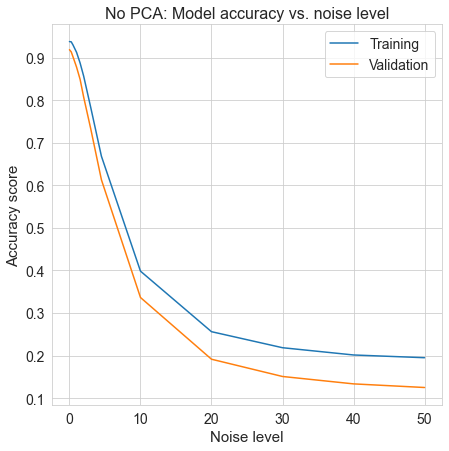

In [4]:
# Set up the accuracy vs. n_noise plot for no PCA
fig_no_pca = plt.figure(figsize=(7, 7))
plt.plot(n_noise, acc_no_pca_tr)
plt.plot(n_noise, acc_no_pca_va)
plt.title('No PCA: Model accuracy vs. noise level', fontsize=16)
plt.xlabel('Noise level', fontsize=15)
plt.ylabel('Accuracy score', fontsize=15)
plt.tick_params(labelsize=14)
plt.legend(['Training', 'Validation'], fontsize=14)
plt.show()

### b. Do the same step above; however, use a fixed PCA (n_component=100) this time. Plot accuracy vs. n_noise on the same plot.

In [5]:
# Initialize an array to hold the accuracy score for each level of n_noise, this time with PCA with 100 components
acc_with_pca100_tr = np.zeros(len(n_noise))
acc_with_pca100_va = np.zeros(len(n_noise))

# For loop to loop through the n_noise values and fit the data with Logistic Regessor
for c_idx, c_noise in enumerate(n_noise):
    
    # Scale the noise by the amount defined by c_noise
    noise_tr = noise_train * c_noise
    noise_va = noise_valid * c_noise
    
    # Set temporary variables in the loop to the baseline MNIST training and validation set and scale
    inp_tr_temp = input_tr/255
    inp_va_temp = input_va/255
    
    # Add the noise to the MNIST data and normalize
    inp_tr_temp = (inp_tr_temp + noise_tr)/(1 + c_noise)
    inp_va_temp = (inp_va_temp + noise_va)/(1 + c_noise)
    
    # Combine the training and test sets
    inpT = np.concatenate((inp_tr_temp, inp_va_temp))
    
    # Print the noise level and shape of input set
    print('Noise level:', c_noise)
    print('The shape of the concatenated input training and validation set is: ', np.shape(inpT))
    print()
    
    # Split the data into training and test
    inp_tr, inp_va, tar_tr, tar_va = train_test_split(inpT, tarT, test_size=0.3, random_state=0)
    
    # Initialize the PCA transformer with n_components = 100
    pca = PCA(n_components=100)

    # Fit the 
    pca.fit(inp_tr)
    inp_tr_pca = pca.transform(inp_tr)
    inp_va_pca = pca.transform(inp_va)
    
    # Set up the logistic regressor
    log_reg = LogisticRegression(penalty='l2', verbose=1)
    
    # Fit the data
    log_reg.fit(inp_tr_pca, tar_tr)  # fit the model with training set

    # Predict the training and validation sets
    pred_tr = log_reg.predict(inp_tr_pca)
    pred_va = log_reg.predict(inp_va_pca)
    
    # Find the accuracy score of the metric
    acc_with_pca100_tr[c_idx] = metrics.accuracy_score(pred_tr, tar_tr)
    acc_with_pca100_va[c_idx] = metrics.accuracy_score(pred_va, tar_va)

Noise level: 0.0
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s finished


Noise level: 0.25
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s finished


Noise level: 0.5
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s finished


Noise level: 1.0
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s finished


Noise level: 1.5
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s finished


Noise level: 2.0
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


Noise level: 3.0
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished


Noise level: 4.5
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished


Noise level: 10.0
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished


Noise level: 20.0
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


Noise level: 30.0
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


Noise level: 40.0
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


Noise level: 50.0
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


### Plot the accuracy score vs. level of noise

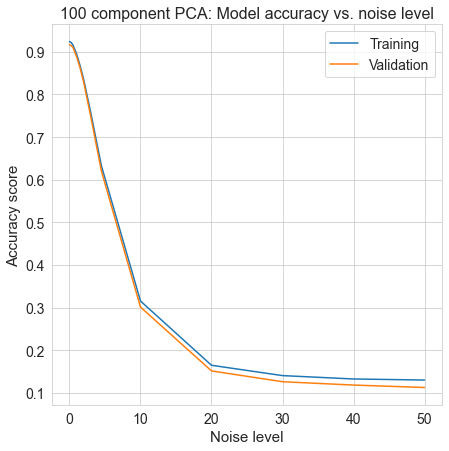

In [6]:
# Set up the accuracy vs. n_noise plot for no PCA
fig_with_pca100 = plt.figure(figsize=(7, 7))
plt.plot(n_noise, acc_with_pca100_tr)
plt.plot(n_noise, acc_with_pca100_va)
plt.title('100 component PCA: Model accuracy vs. noise level', fontsize=16)
plt.xlabel('Noise level', fontsize=15)
plt.ylabel('Accuracy score', fontsize=15)
plt.tick_params(labelsize=14)
plt.legend(['Training', 'Validation'], fontsize=14)
plt.show()

### c. Do the same above with PCA (n_components=20).

In [7]:
# Initialize an array to hold the accuracy score for each level of n_noise, this time with PCA with 20 components
acc_with_pca20_tr = np.zeros(len(n_noise))
acc_with_pca20_va = np.zeros(len(n_noise))

# For loop to loop through the n_noise values and fit the data with Logistic Regessor
for c_idx, c_noise in enumerate(n_noise):
    
       # Scale the noise by the amount defined by c_noise
    noise_tr = noise_train * c_noise
    noise_va = noise_valid * c_noise
    
    # Set temporary variables in the loop to the baseline MNIST training and validation set and scale
    inp_tr_temp = input_tr/255
    inp_va_temp = input_va/255
    
    # Add the noise to the MNIST data and normalize
    inp_tr_temp = (inp_tr_temp + noise_tr)/(1 + c_noise)
    inp_va_temp = (inp_va_temp + noise_va)/(1 + c_noise)
    
    # Combine the training and test sets
    inpT = np.concatenate((inp_tr_temp, inp_va_temp))
    
    # Print the noise level and shape of input set
    print('Noise level:', c_noise)
    print('The shape of the concatenated input training and validation set is: ', np.shape(inpT))
    print()
    
    # Split the data into training and test
    inp_tr, inp_va, tar_tr, tar_va = train_test_split(inpT, tarT, test_size=0.3, random_state=0)
    
    # Initialize the PCA transformer with n_components = 100
    pca = PCA(n_components=100)

    # Fit the 
    pca.fit(inp_tr)
    inp_tr_pca = pca.transform(inp_tr)
    inp_va_pca = pca.transform(inp_va)
    
    # Set up the logistic regressor
    log_reg = LogisticRegression(penalty='l2', verbose=1)
    
    # Fit the data
    log_reg.fit(inp_tr_pca, tar_tr)  # fit the model with training set

    # Predict the training and validation sets
    pred_tr = log_reg.predict(inp_tr_pca)
    pred_va = log_reg.predict(inp_va_pca)
    
    # Find the accuracy score of the metric
    acc_with_pca20_tr[c_idx] = metrics.accuracy_score(pred_tr, tar_tr)
    acc_with_pca20_va[c_idx] = metrics.accuracy_score(pred_va, tar_va)

Noise level: 0.0
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s finished


Noise level: 0.25
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s finished


Noise level: 0.5
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s finished


Noise level: 1.0
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s finished


Noise level: 1.5
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s finished


Noise level: 2.0
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s finished


Noise level: 3.0
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s finished


Noise level: 4.5
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished


Noise level: 10.0
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished


Noise level: 20.0
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


Noise level: 30.0
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


Noise level: 40.0
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


Noise level: 50.0
The shape of the concatenated input training and validation set is:  (70000, 784)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


### Plot the accuracy score vs. level of noise

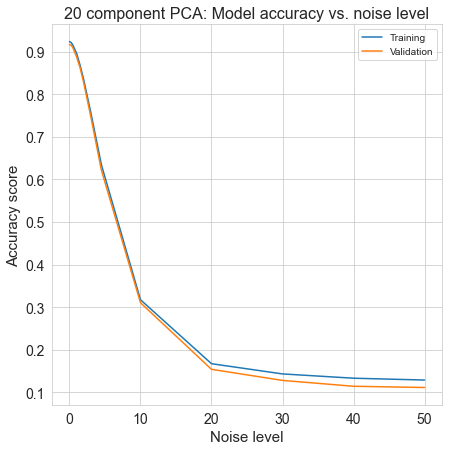

In [8]:
# Set up the accuracy vs. n_noise plot for no PCA
fig_with_pca20 = plt.figure(figsize=(7, 7))
plt.plot(n_noise, acc_with_pca20_tr)
plt.plot(n_noise, acc_with_pca20_va)
plt.title('20 component PCA: Model accuracy vs. noise level', fontsize=16)
plt.xlabel('Noise level', fontsize=15)
plt.ylabel('Accuracy score', fontsize=15)
plt.tick_params(labelsize=14)
plt.legend(['Training', 'Validation'])
plt.show()

### d. Compare three curves and discuss/explain what you see in the plot. 

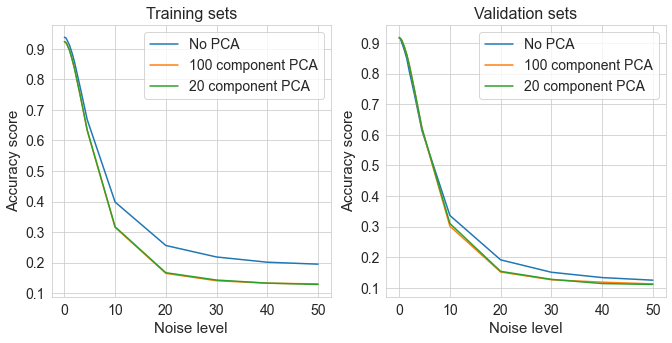

In [9]:
# Set up the figure with all 3 plots
fig_all, ax = plt.subplots(1, 2, figsize=(11, 5))

# Training sets
ax[0].plot(n_noise, acc_no_pca_tr)
ax[0].plot(n_noise, acc_with_pca100_tr)
ax[0].plot(n_noise, acc_with_pca20_tr)
ax[0].set_title('Training sets', fontsize=16)
ax[0].set_xlabel('Noise level', fontsize=15)
ax[0].set_ylabel('Accuracy score', fontsize=15)
ax[0].tick_params(labelsize=14)
ax[0].legend(['No PCA', '100 component PCA', '20 component PCA'], fontsize=14)

# Validation sets
ax[1].plot(n_noise, acc_no_pca_va)
ax[1].plot(n_noise, acc_with_pca100_va)
ax[1].plot(n_noise, acc_with_pca20_va)
ax[1].set_title('Validation sets', fontsize=16)
ax[1].set_xlabel('Noise level', fontsize=15)
ax[1].set_ylabel('Accuracy score', fontsize=15)
ax[1].tick_params(labelsize=14)
ax[1].legend(['No PCA', '100 component PCA', '20 component PCA'], fontsize=14)

# # Components = 20
# ax[2].plot(n_noise, acc_with_pca20)
# ax[2].set_title('20 component PCA', fontsize=16)
# ax[2].set_xlabel('Noise level', fontsize=15)
# ax[2].set_ylabel('Accuracy score', fontsize=15)
# ax[2].tick_params(labelsize=14)

# plt.subplots_adjust(wspace=0.3)
# plt.show()